In [1]:
import pandas as pd

# Excel no tiene disponible funciones de semillas de reproducibilidad, por lo tanto es necesario guardar los datos de forma estática.
# Para controlar que se traten de valores aleatorios se puede entrar al excel y observar la distribución de los valores aleatorios.

# df = pd.read_excel('CASOMUYSENCILLO.xlsm', sheet_name=None)  

# with pd.ExcelWriter('Datos\casomuysencilloestáticoA.xlsx') as writer:
#     for sheet_name, data in df.items():
#         data.to_excel(writer, sheet_name=sheet_name, index=False)

# Se cambian los parámetros y se vuelve a correr:
# df = pd.read_excel('CASOMUYSENCILLO.xlsm', sheet_name=None)  

# with pd.ExcelWriter('Datos\casomuysencilloestáticoB.xlsx') as writer:
#     for sheet_name, data in df.items():
#         data.to_excel(writer, sheet_name=sheet_name, index=False)

In [2]:
df = pd.read_excel('Datos/casomuysencilloestáticoA.xlsx', usecols="B:V", skiprows=7)
Trayectorias = df[2:32]
Ciclo = df.iloc[0] # Contiene donde comienza el ciclo

df = pd.read_excel('Datos/casomuysencilloestáticoB.xlsx', usecols="B:V", skiprows=7)
Trayectorias2 = df[2:32]
Ciclo2 = df.iloc[0] 


C:\Users\Javier\AppData\Local\Temp\ipykernel_15836\2241255693.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20c')


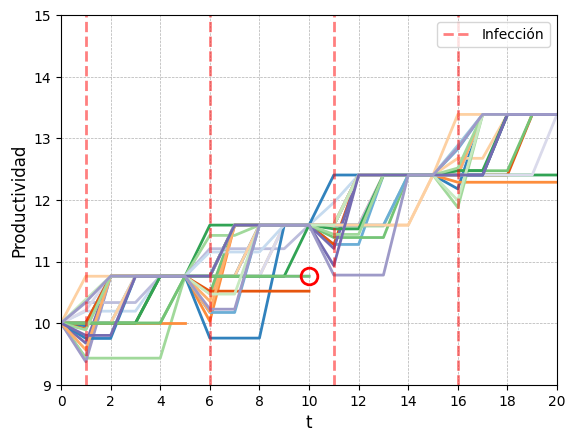

In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import numpy as np


cmap = cm.get_cmap('tab20c')
num_colors = 16
colors = [cmap(i % num_colors) for i in range(Trayectorias.shape[0])]

  
for i in range(Trayectorias.shape[0]):
    color = cmap(i / Trayectorias.shape[0])
    filtered_values = Trayectorias.iloc[i][Trayectorias.iloc[i] != 0]
    if not filtered_values.empty:
        plt.plot(filtered_values.index, filtered_values.values, color= colors[i], lw=2)  # Graficar con color personalizado

first_infection = True

for periodo in Ciclo[Ciclo != 0]:
    if first_infection:
        # Add the label to the first infection period
        plt.axvline(x=periodo, color='red', linestyle='--', lw=2, alpha=0.5, label='Infección')
        first_infection = False  # Set flag to False after the first infection
    else:
        # For subsequent infection periods, just plot the line without the label
        plt.axvline(x=periodo, color='red', linestyle='--', lw=2, alpha=0.5)

plt.plot(10, Trayectorias.iloc[13][9], 'o', markersize=12, color='red', markerfacecolor='none', markeredgewidth=2, zorder=7)

plt.xlabel("t", fontsize=12)
plt.ylabel("Productividad", fontsize=12)
plt.xlim(0, 20)
plt.ylim(9, 15)
plt.legend(loc='upper right', fontsize=10)
plt.xticks(range(0, len(Trayectorias.columns) + 1, 2))

plt.grid(ls='dashed', lw=0.5)
plt.savefig('Imagenes/sencillo.png', dpi=300, bbox_inches='tight')



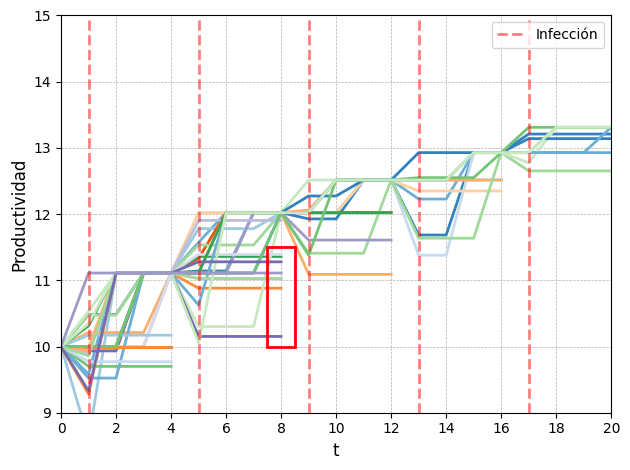

In [4]:
import matplotlib.patches as patches

for i in range(Trayectorias2.shape[0]):
    color = cmap(i / Trayectorias2.shape[0])
    filtered_values = Trayectorias2.iloc[i][Trayectorias2.iloc[i] != 0]
    if not filtered_values.empty:
        plt.plot(filtered_values.index, filtered_values.values, color= colors[i], lw=2)  # Graficar con color personalizado

first_infection = True

for periodo in Ciclo2[Ciclo2 != 0]:
    if first_infection:
        # Add the label to the first infection period
        plt.axvline(x=periodo, color='red', linestyle='--', lw=2, alpha=0.5, label='Infección')
        first_infection = False  # Set flag to False after the first infection
    else:
        # For subsequent infection periods, just plot the line without the label
        plt.axvline(x=periodo, color='red', linestyle='--', lw=2, alpha=0.5)

rect = patches.Rectangle((7.5, 10), 1, 1.5, linewidth=2, edgecolor='red', facecolor='none', zorder = 100)
plt.gca().add_patch(rect)

plt.xlabel("t", fontsize=12)
plt.ylabel("Productividad", fontsize=12)
plt.xlim(0, 20)
plt.ylim(9, 15)
plt.legend(loc='upper right', fontsize=10)
plt.xticks(range(0, len(Trayectorias.columns) + 1, 2))

plt.grid(ls='dashed', lw=0.5)

plt.savefig('Imagenes/sencillo1.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()


C:\Users\Javier\AppData\Local\Temp\ipykernel_15836\2420771649.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20c')


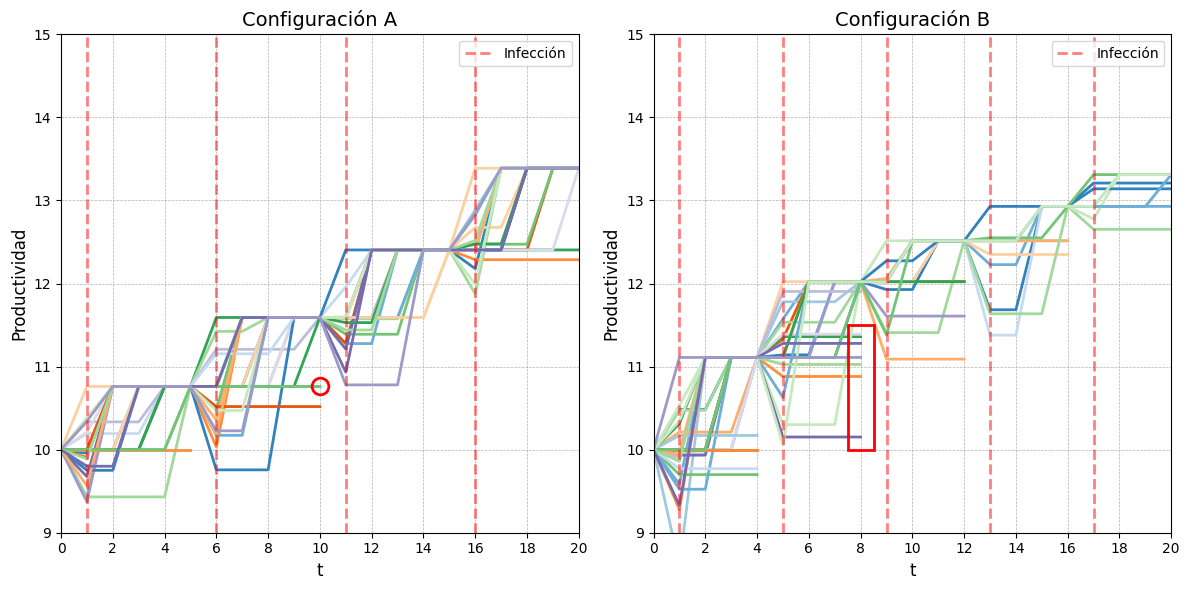

In [5]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import numpy as np
import matplotlib.patches as patches

# Crear una figura con dos subplots horizontales
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Colormap
cmap = cm.get_cmap('tab20c')
num_colors = 16
colors = [cmap(i % num_colors) for i in range(Trayectorias.shape[0])]

# Primer subplot (Trayectorias)
for i in range(Trayectorias.shape[0]):
    color = cmap(i / Trayectorias.shape[0])
    filtered_values = Trayectorias.iloc[i][Trayectorias.iloc[i] != 0]
    if not filtered_values.empty:
        ax1.plot(filtered_values.index, filtered_values.values, color=colors[i], lw=2)  # Graficar con color personalizado

first_infection = True

for periodo in Ciclo[Ciclo != 0]:
    if first_infection:
        # Add the label to the first infection period
        ax1.axvline(x=periodo, color='red', linestyle='--', lw=2, alpha=0.5, label='Infección')
        first_infection = False  # Set flag to False after the first infection
    else:
        # For subsequent infection periods, just plot the line without the label
        ax1.axvline(x=periodo, color='red', linestyle='--', lw=2, alpha=0.5)

ax1.plot(10, Trayectorias.iloc[13][9], 'o', markersize=12, color='red', markerfacecolor='none', markeredgewidth=2, zorder=7)

ax1.set_xlabel("t", fontsize=12)
ax1.set_ylabel("Productividad", fontsize=12)
ax1.set_xlim(0, 20)
ax1.set_ylim(9, 15)
ax1.legend(loc='upper right', fontsize=10)
ax1.set_xticks(range(0, len(Trayectorias.columns) + 1, 2))
ax1.grid(ls='dashed', lw=0.5)

# Segundo subplot (Trayectorias2)
for i in range(Trayectorias2.shape[0]):
    color = cmap(i / Trayectorias2.shape[0])
    filtered_values = Trayectorias2.iloc[i][Trayectorias2.iloc[i] != 0]
    if not filtered_values.empty:
        ax2.plot(filtered_values.index, filtered_values.values, color=colors[i], lw=2)  # Graficar con color personalizado

first_infection = True

for periodo in Ciclo2[Ciclo2 != 0]:
    if first_infection:
        # Add the label to the first infection period
        ax2.axvline(x=periodo, color='red', linestyle='--', lw=2, alpha=0.5, label='Infección')
        first_infection = False  # Set flag to False after the first infection
    else:
        # For subsequent infection periods, just plot the line without the label
        ax2.axvline(x=periodo, color='red', linestyle='--', lw=2, alpha=0.5)

rect = patches.Rectangle((7.5, 10), 1, 1.5, linewidth=2, edgecolor='red', facecolor='none', zorder=100)
ax2.add_patch(rect)

ax2.set_xlabel("t", fontsize=12)
ax2.set_ylabel("Productividad", fontsize=12)
ax2.set_xlim(0, 20)
ax2.set_ylim(9, 15)
ax1.set_title("Configuración A", fontsize=14)
ax2.set_title("Configuración B", fontsize=14)
ax2.legend(loc='upper right', fontsize=10)
ax2.set_xticks(range(0, len(Trayectorias.columns) + 1, 2))
ax2.grid(ls='dashed', lw=0.5)

# Ajustar el layout y guardar la figura
plt.tight_layout()
plt.savefig('Imagenes/sencillo_subplot.png', dpi=300, bbox_inches='tight')
plt.show()